INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Optim
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Cloning pkgname from https://github.com/mpf/Toms566.jl


LoadError: pkgname already exists
while loading In[44], in expression starting on line 3

In [3]:
##############
# Minimizers #
##############



# Minimization algorithm using gradient descent
# f  the objective function
# g  the gradient of f
# x  an initial testing point
# tolerance a small number
function minimize(f,g, x::Vector, tolerance, max_iter = 6000)
    alpha =0.3
    beta = 0.7
    iter = 0
    while sqrt(sum(g(x).^2)) > tolerance && iter < max_iter
        dx = -g(x)
        t = 1
        while f(x+t*dx) > f(x) + alpha*t*sum(g(x).*dx)
            t = beta*t
        end
        x = x + t*dx
        iter = iter + 1
        print("$iter, ")
    end
    return x
end


# Minimization algorithm using Newton's method
# f  the objective function
# g  the gradient of f
# h  the Hessian of f
# x  an initial testing point
# tolerance a small number
function minimizenewt(f,g, H, x::Vector, tolerance, max_iter = 6000)
    alpha =0.3
    beta = 0.7
    iter = 0
    while sqrt(sum(g(x).^2)) > tolerance && iter < max_iter
        dx = -H(x)\g(x)
        t = 1
        while f(x+t*dx) > f(x) + alpha*t*sum(g(x).*dx)
            t = beta*t
        end
        x = x + t*dx
        iter = iter + 1
        print("$iter, ")
    end
    return x
end


minimizenewt (generic function with 2 methods)

In [8]:

Pkg.add("Toms566")
Pkg.update()
using Toms566

p = Problem(1) # Hellical Valley
x = p.x0       # standard starting point
f = p.obj(x)   # objective value at x
g = p.grd(x)   # gradient at x
H = p.hes(x)   # Hessian at x

m = minimizenewt(f,g,H, x, 0.1)



INFO: Nothing to be done
INFO: Updating METADATA...
INFO: Updating 123asdf...
INFO: Updating pkgname...
INFO: Updating Toms566...
INFO: Updating testingstuffyaay...
INFO: Computing changes...
INFO: No packages to install, update or remove


LoadError: Problem not defined
while loading In[8], in expression starting on line 6

1, 2, 3, 4, 5, 6, 7, 8, 9, minimizer = [0.5381367191928651,0.7546868559629334,-4.949378062622545], minimum value = 240.1719908424144

INFO: Nothing to be done


alpha1 = 0.5381367191928651
alpha2 = 0.7546868559629334
beta = -4.949378062622545


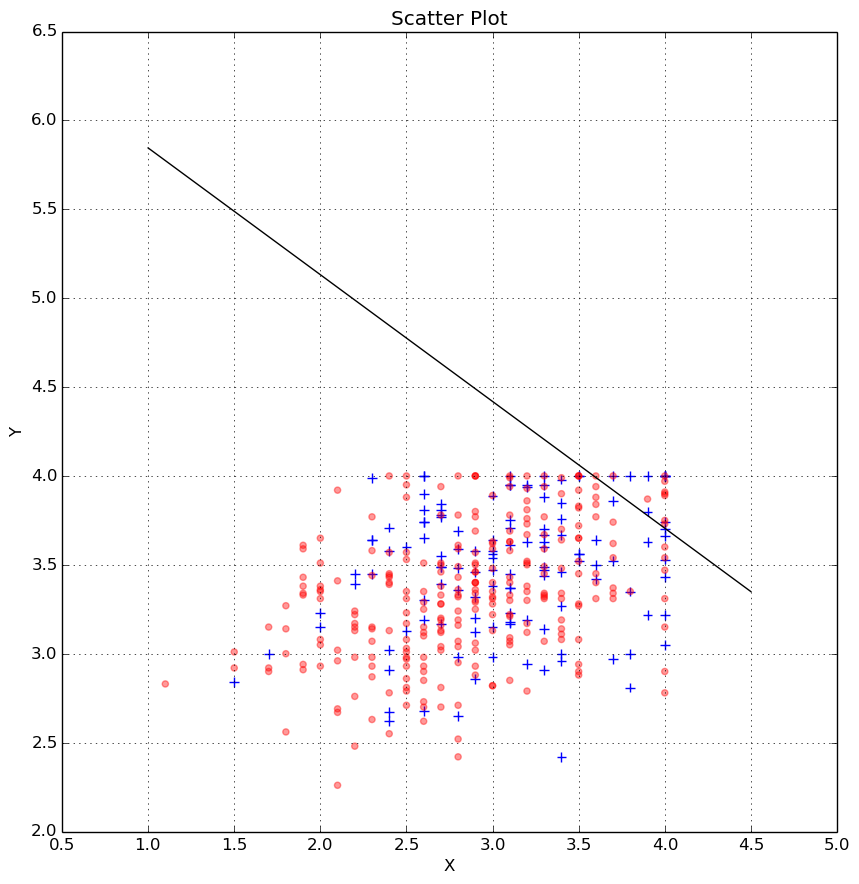

In [5]:
################################
# Logistic regression plotting #
################################

admissions = readdlm("binary.csv", ',');
y = admissions[:,1] # the binary value of being admitted or not
u = admissions[:,2:3]; # on the first column is the GRE, the second column is the GPA
u1 = u[:,1]/200;
u2 = u[:,2];


number_of_data_points = size(u)[1]

# Objective function
function f(x::Vector)
    a1 = x[1]
    a2 = x[2]
    b = x[3]
    X = [(a1*u1[i] + a2*u2[i] +b)::Float64 for i in 1:number_of_data_points]
    return -sum(X.*y - log(1+exp(X)))
end

# Gradient of the objective function, in this case, it was computed analytically
function g(x::Vector)
    a1 = x[1]
    a2 = x[2]
    b = x[3]
    X = [(a1*u1[i] + a2*u2[i] +b)::Float64 for i in 1:number_of_data_points]
    partial_a1 = -sum(u1.*y - (1./(1+exp(X))).*u1.*exp(X))
    partial_a2 = -sum(u2.*y - (1./(1+exp(X))).*u2.*exp(X))
    partial_b  = -sum(y - (1./(1+exp(X))).*exp(X))
    return [partial_a1, partial_a2, partial_b]
end

# Hessian of objective function, again computed analytically
# returns the matrix of mixed second order partials
# a1a1 a1a2 a1b 
# a2a1 a2a2 a2b
# ba1  ba2  bb
function H(x::Vector)
    a1 = x[1]
    a2 = x[2]
    b = x[3]
    X = [(a1*u1[i] + a2*u2[i] +b)::Float64 for i in 1:number_of_data_points]
    Z = exp(X)./((1+exp(X)).^2)
    partial_a1a1 =sum(Z.*(u1.^2))
    partial_a1a2 =sum(Z.*u1.*u2)
    partial_a1b =sum(Z.*u1)
    partial_a2a2 = sum(Z.*u2.*u2)
    partial_a2b = sum(Z.*u2)
    partial_bb = sum(Z)
    A = [[partial_a1a1 partial_a1a2 partial_a1b] [partial_a1a2 partial_a2a2 partial_a2b] [partial_a1b partial_a2b partial_bb]]
    return reshape(A,3,3)
end
# println(f([0,0,0]))
# println(g([0,0,0]))
# println(h([0,0,0]))
m = minimizenewt(f,g, H, [10,10,10], 0.0000000001)
print("minimizer = $m, minimum value = $(f(m))")


Pkg.add("PyPlot")
using PyPlot

##########
#  Data  #
##########
X = u1
Y = u2
areas1 = 10
areas0 = 5

# Gives the index of i such that y[i]==1 if admitted, y[i]==0 if rejected
admitted = filter(i -> y[i]==1, 1:number_of_data_points)
rejected = filter(i -> y[i]==0, 1:number_of_data_points)

X1 = [X[i] for i in admitted]
Y1 = [Y[i] for i in admitted]

X2 = [X[i] for i in rejected]
Y2 = [Y[i] for i in rejected]
##################
#  Scatter Plot  #
##################
fig = figure("pyplot_scatterplot",figsize=(10,10))
ax = axes()
scatter(X1,Y1, marker ="+", color = "b", s=50)
scatter(X2,Y2, marker ="o", color = "r", alpha=0.4)
(alpha1, alpha2, beta) = m
print("alpha1 = ")
println(alpha1)
print("alpha2 = ")
println(alpha2)
print("beta = ")
println(beta)

r = 1:(0.1/50):4.5
plot(r,(-alpha1*r - beta)/(alpha2), "k")
title("Scatter Plot")
xlabel("X")
ylabel("Y")
grid("on")


In [65]:
# Simple test function

m = 100
n = 2
x = [3;1]
A = randn(m,n)
b = A*x
f1(x) = 0.5*norm(A*x-b)^2
g1(x) = A'*(A*x-b)
H1(x) = A'*A
minimizenewt(f1,g1,H1, [1000,100], 0.1)


1, 

2-element Array{Float64,1}:
 3.0
 1.0